BEST FIT LINE - Cost function using un-constrained method - Gradient descent 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [15]:
#reading data
data=pd.read_table("auto-mpg.data.txt",header=None, sep="\s+", names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
data.replace('?','0', inplace=True)



In [17]:
data=pd.DataFrame(data, columns=['mpg','acceleration'])
data.head()


,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [18]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [19]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


In [20]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]


In [21]:
points=data
points=points.reset_index().values
print(points[:10])
# Initialize the hyper parameters
learning_rate = 0.0003
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000


[[  0.   18.   12. ]
 [  1.   15.   11.5]
 [  2.   18.   11. ]
 [  3.   16.   12. ]
 [  4.   17.   10.5]
 [  5.   15.   10. ]
 [  6.   14.    9. ]
 [  7.   14.    8.5]
 [  8.   14.   10. ]
 [  9.   15.    8.5]]


In [22]:
print(points[1,1])

print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

points[1]


15.0
Starting gradient descent at b = 0, m = 0, error = 613.8712562814071
After 1000 iterations b = 0.18078653250334187, m = 1.4895216017474315, error = 50.868233840004144


array([  1. ,  15. ,  11.5])

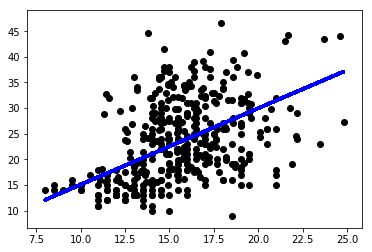

In [32]:
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='black')

        plt.plot(data.acceleration, (1.4895216017474315 * data.acceleration + 0.18078653250334187), color='blue',linewidth=3)
plt.plot(data.acceleration, (1.4895216017474315 * data.acceleration + 0.18078653250334187), color='blue',linewidth=3)
plt.show()
